In [1]:
from datetime import datetime
import xlrd
import pandas as pd
import seaborn as sns
import matplotlib as plot

In [2]:
cabdata = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
customerid = pd.read_csv("Customer_ID.csv")
transactionid = pd.read_csv("Transaction_ID.csv")
cabdata.sort_values(by=['Date of Travel'])
cabdata["Date of Travel"] = cabdata["Date of Travel"].map(lambda x: datetime(*xlrd.xldate_as_tuple(int(x), 0)))
cabdata["year"] = pd.DatetimeIndex(cabdata["Date of Travel"]).year
cabdata["month"] = pd.DatetimeIndex(cabdata["Date of Travel"]).month
cabdata

Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-08    Pink Cab     ATLANTA GA   
1             10000012     2016-01-06    Pink Cab     ATLANTA GA   
2             10000013     2016-01-02    Pink Cab     ATLANTA GA   
3             10000014     2016-01-07    Pink Cab     ATLANTA GA   
4             10000015     2016-01-03    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     2018-01-08  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-04  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-05  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-05  Yellow Cab  WASHINGTON DC   
359391        10440107     2018-01-02  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  year  month  
0              30.45         370.95      313.6350  2016      1  
1              28.62         358.52      334.8540  2016      1  
2               9.04         125.20       97.6320  2016      1  
3              33.17         377.40      351.6020  2016      1  
4               8.73         114.62       97.7760  2016      1  
...              ...            ...           ...   ...    ...  
359387          4.80          69.24       63.3600  2018      1  
359388          8.40         113.75      106.8480  2018      1  
359389         27.75         437.07      349.6500  2018      1  
359390          8.80         146.19      114.0480  2018      1  
359391         12.76         191.58      177.6192  2018      1  

[359392 rows x 9 columns]

In [3]:
cabdata.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  year  month  
0         370.95       313.635  2016      1  
1         358.52       334.854  2016      1  
2         125.20        97.632  2016      1  
3         377.40       351.602  2016      1  
4         114.62        97.776  2016      1

In [4]:
city.head()

City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247

In [5]:
customerid.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [6]:
transactionid.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [7]:
df1 = pd.merge(transactionid, cabdata)
df1

Transaction ID  Customer ID Payment_Mode Date of Travel     Company  \
0             10000011        29290         Card     2016-01-08    Pink Cab   
1             10000012        27703         Card     2016-01-06    Pink Cab   
2             10000013        28712         Cash     2016-01-02    Pink Cab   
3             10000014        28020         Cash     2016-01-07    Pink Cab   
4             10000015        27182         Card     2016-01-03    Pink Cab   
...                ...          ...          ...            ...         ...   
359387        10440101        52392         Cash     2018-01-08  Yellow Cab   
359388        10440104        53286         Cash     2018-01-04  Yellow Cab   
359389        10440105        52265         Cash     2018-01-05  Yellow Cab   
359390        10440106        52175         Card     2018-01-05  Yellow Cab   
359391        10440107        52917         Card     2018-01-02  Yellow Cab   

                 City  KM Travelled  Price Charged  Cost of Trip  year  month  
0          ATLANTA GA         30.45         370.95      313.6350  2016      1  
1          ATLANTA GA         28.62         358.52      334.8540  2016      1  
2          ATLANTA GA          9.04         125.20       97.6320  2016      1  
3          ATLANTA GA         33.17         377.40      351.6020  2016      1  
4          ATLANTA GA          8.73         114.62       97.7760  2016      1  
...               ...           ...            ...           ...   ...    ...  
359387  WASHINGTON DC          4.80          69.24       63.3600  2018      1  
359388  WASHINGTON DC          8.40         113.75      106.8480  2018      1  
359389  WASHINGTON DC         27.75         437.07      349.6500  2018      1  
359390  WASHINGTON DC          8.80         146.19      114.0480  2018      1  
359391  WASHINGTON DC         12.76         191.58      177.6192  2018      1  

[359392 rows x 11 columns]

In [8]:
df = pd.merge(df1, customerid)
df

Transaction ID  Customer ID Payment_Mode Date of Travel     Company  \
0             10000011        29290         Card     2016-01-08    Pink Cab   
1             10351127        29290         Cash     2018-07-21  Yellow Cab   
2             10412921        29290         Card     2018-11-23  Yellow Cab   
3             10000012        27703         Card     2016-01-06    Pink Cab   
4             10320494        27703         Card     2018-04-21  Yellow Cab   
...                ...          ...          ...            ...         ...   
359387        10439790        38520         Card     2018-01-07  Yellow Cab   
359388        10439799        12490         Cash     2018-01-03  Yellow Cab   
359389        10439838        41414         Card     2018-01-04  Yellow Cab   
359390        10439840        41677         Cash     2018-01-06  Yellow Cab   
359391        10439846        39761         Card     2018-01-04  Yellow Cab   

                  City  KM Travelled  Price Charged  Cost of Trip  year  \
0           ATLANTA GA         30.45         370.95      313.6350  2016   
1           ATLANTA GA         26.19         598.70      317.4228  2018   
2           ATLANTA GA         42.55         792.05      597.4020  2018   
3           ATLANTA GA         28.62         358.52      334.8540  2016   
4           ATLANTA GA         36.38         721.10      467.1192  2018   
...                ...           ...            ...           ...   ...   
359387      SEATTLE WA         16.66         261.18      213.9144  2018   
359388  SILICON VALLEY         13.72         277.97      172.8720  2018   
359389       TUCSON AZ         19.00         303.77      232.5600  2018   
359390       TUCSON AZ          5.60          92.42       70.5600  2018   
359391       TUCSON AZ         13.30         244.65      180.3480  2018   

        month  Gender  Age  Income (USD/Month)  
0           1    Male   28               10813  
1           7    Male   28               10813  
2          11    Male   28               10813  
3           1    Male   27                9237  
4           4    Male   27                9237  
...       ...     ...  ...                 ...  
359387      1  Female   42               19417  
359388      1    Male   33               18713  
359389      1    Male   38                3960  
359390      1    Male   23               19454  
359391      1  Female   32               10128  

[359392 rows x 14 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  object        
 3   Date of Travel      359392 non-null  datetime64[ns]
 4   Company             359392 non-null  object        
 5   City                359392 non-null  object        
 6   KM Travelled        359392 non-null  float64       
 7   Price Charged       359392 non-null  float64       
 8   Cost of Trip        359392 non-null  float64       
 9   year                359392 non-null  int64         
 10  month               359392 non-null  int64         
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [10]:
df.dropna()

Transaction ID  Customer ID Payment_Mode Date of Travel     Company  \
0             10000011        29290         Card     2016-01-08    Pink Cab   
1             10351127        29290         Cash     2018-07-21  Yellow Cab   
2             10412921        29290         Card     2018-11-23  Yellow Cab   
3             10000012        27703         Card     2016-01-06    Pink Cab   
4             10320494        27703         Card     2018-04-21  Yellow Cab   
...                ...          ...          ...            ...         ...   
359387        10439790        38520         Card     2018-01-07  Yellow Cab   
359388        10439799        12490         Cash     2018-01-03  Yellow Cab   
359389        10439838        41414         Card     2018-01-04  Yellow Cab   
359390        10439840        41677         Cash     2018-01-06  Yellow Cab   
359391        10439846        39761         Card     2018-01-04  Yellow Cab   

                  City  KM Travelled  Price Charged  Cost of Trip  year  \
0           ATLANTA GA         30.45         370.95      313.6350  2016   
1           ATLANTA GA         26.19         598.70      317.4228  2018   
2           ATLANTA GA         42.55         792.05      597.4020  2018   
3           ATLANTA GA         28.62         358.52      334.8540  2016   
4           ATLANTA GA         36.38         721.10      467.1192  2018   
...                ...           ...            ...           ...   ...   
359387      SEATTLE WA         16.66         261.18      213.9144  2018   
359388  SILICON VALLEY         13.72         277.97      172.8720  2018   
359389       TUCSON AZ         19.00         303.77      232.5600  2018   
359390       TUCSON AZ          5.60          92.42       70.5600  2018   
359391       TUCSON AZ         13.30         244.65      180.3480  2018   

        month  Gender  Age  Income (USD/Month)  
0           1    Male   28               10813  
1           7    Male   28               10813  
2          11    Male   28               10813  
3           1    Male   27                9237  
4           4    Male   27                9237  
...       ...     ...  ...                 ...  
359387      1  Female   42               19417  
359388      1    Male   33               18713  
359389      1    Male   38                3960  
359390      1    Male   23               19454  
359391      1  Female   32               10128  

[359392 rows x 14 columns]

In [11]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [12]:
city["Population"] = city["Population"].str.replace(",", "")

city["Users"] = city["Users"].str.replace(",", "")
city["Population"] = city["Population"].astype(float)
city["Users"] = city["Users"].astype(float)


In [13]:
city["Percantage of Users"] = city["Users"]/city["Population"]*100
city

City  Population     Users  Percantage of Users
0        NEW YORK NY   8405837.0  302149.0             3.594514
1         CHICAGO IL   1955130.0  164468.0             8.412126
2     LOS ANGELES CA   1595037.0  144132.0             9.036279
3           MIAMI FL   1339155.0   17675.0             1.319862
4     SILICON VALLEY   1177609.0   27247.0             2.313756
5      ORANGE COUNTY   1030185.0   12994.0             1.261327
6       SAN DIEGO CA    959307.0   69995.0             7.296413
7         PHOENIX AZ    943999.0    6133.0             0.649683
8          DALLAS TX    942908.0   22157.0             2.349858
9         ATLANTA GA    814885.0   24701.0             3.031225
10         DENVER CO    754233.0   12421.0             1.646839
11         AUSTIN TX    698371.0   14978.0             2.144705
12        SEATTLE WA    671238.0   25063.0             3.733847
13         TUCSON AZ    631442.0    5712.0             0.904596
14  SAN FRANCISCO CA    629591.0  213609.0            33.928217
15     SACRAMENTO CA    545776.0    7044.0             1.290639
16     PITTSBURGH PA    542085.0    3643.0             0.672035
17     WASHINGTON DC    418859.0  127001.0            30.320705
18      NASHVILLE TN    327225.0    9270.0             2.832913
19         BOSTON MA    248968.0   80021.0            32.141078

In [14]:
df["Profit"] = df["Price Charged"] - df["Cost of Trip"]
df["Profit per KM"] = df["Profit"] / df["KM Travelled"]
df["Profit Percentage"] = df["Profit"]/df["Price Charged"]*100
df["Customer ID"] = df["Customer ID"].astype(str)
df["Transaction ID"] = df["Transaction ID"].astype(str)

In [15]:
df

Transaction ID Customer ID Payment_Mode Date of Travel     Company  \
0            10000011       29290         Card     2016-01-08    Pink Cab   
1            10351127       29290         Cash     2018-07-21  Yellow Cab   
2            10412921       29290         Card     2018-11-23  Yellow Cab   
3            10000012       27703         Card     2016-01-06    Pink Cab   
4            10320494       27703         Card     2018-04-21  Yellow Cab   
...               ...         ...          ...            ...         ...   
359387       10439790       38520         Card     2018-01-07  Yellow Cab   
359388       10439799       12490         Cash     2018-01-03  Yellow Cab   
359389       10439838       41414         Card     2018-01-04  Yellow Cab   
359390       10439840       41677         Cash     2018-01-06  Yellow Cab   
359391       10439846       39761         Card     2018-01-04  Yellow Cab   

                  City  KM Travelled  Price Charged  Cost of Trip  year  \
0           ATLANTA GA         30.45         370.95      313.6350  2016   
1           ATLANTA GA         26.19         598.70      317.4228  2018   
2           ATLANTA GA         42.55         792.05      597.4020  2018   
3           ATLANTA GA         28.62         358.52      334.8540  2016   
4           ATLANTA GA         36.38         721.10      467.1192  2018   
...                ...           ...            ...           ...   ...   
359387      SEATTLE WA         16.66         261.18      213.9144  2018   
359388  SILICON VALLEY         13.72         277.97      172.8720  2018   
359389       TUCSON AZ         19.00         303.77      232.5600  2018   
359390       TUCSON AZ          5.60          92.42       70.5600  2018   
359391       TUCSON AZ         13.30         244.65      180.3480  2018   

        month  Gender  Age  Income (USD/Month)    Profit  Profit per KM  \
0           1    Male   28               10813   57.3150       1.882266   
1           7    Male   28               10813  281.2772      10.739870   
2          11    Male   28               10813  194.6480       4.574571   
3           1    Male   27                9237   23.6660       0.826904   
4           4    Male   27                9237  253.9808       6.981330   
...       ...     ...  ...                 ...       ...            ...   
359387      1  Female   42               19417   47.2656       2.837071   
359388      1    Male   33               18713  105.0980       7.660204   
359389      1    Male   38                3960   71.2100       3.747895   
359390      1    Male   23               19454   21.8600       3.903571   
359391      1  Female   32               10128   64.3020       4.834737   

        Profit Percentage  
0               15.450869  
1               46.981326  
2               24.575216  
3                6.601026  
4               35.221301  
...                   ...  
359387          18.096945  
359388          37.809116  
359389          23.442078  
359390          23.652889  
359391          26.283262  

[359392 rows x 17 columns]

In [16]:
gbycompany = df.groupby("Company")
pinkcab = gbycompany.get_group("Pink Cab")
pinkcab.head()

Transaction ID Customer ID Payment_Mode Date of Travel   Company  \
0        10000011       29290         Card     2016-01-08  Pink Cab   
3        10000012       27703         Card     2016-01-06  Pink Cab   
6        10395626       27703         Card     2018-10-27  Pink Cab   
7        10000013       28712         Cash     2016-01-02  Pink Cab   
11       10000014       28020         Cash     2016-01-07  Pink Cab   

          City  KM Travelled  Price Charged  Cost of Trip  year  month Gender  \
0   ATLANTA GA         30.45         370.95       313.635  2016      1   Male   
3   ATLANTA GA         28.62         358.52       334.854  2016      1   Male   
6   ATLANTA GA         13.39         167.03       141.934  2018     10   Male   
7   ATLANTA GA          9.04         125.20        97.632  2016      1   Male   
11  ATLANTA GA         33.17         377.40       351.602  2016      1   Male   

    Age  Income (USD/Month)  Profit  Profit per KM  Profit Percentage  
0    28               10813  57.315       1.882266          15.450869  
3    27                9237  23.666       0.826904           6.601026  
6    27                9237  25.096       1.874235          15.024846  
7    53               11242  27.568       3.049558          22.019169  
11   23               23327  25.798       0.777751           6.835718

In [17]:
yellowcab = gbycompany.get_group("Yellow Cab")
yellowcab.head()

Transaction ID Customer ID Payment_Mode Date of Travel     Company  \
1       10351127       29290         Cash     2018-07-21  Yellow Cab   
2       10412921       29290         Card     2018-11-23  Yellow Cab   
4       10320494       27703         Card     2018-04-21  Yellow Cab   
5       10324737       27703         Cash     2018-05-04  Yellow Cab   
8       10079404       28712         Card     2016-09-21  Yellow Cab   

         City  KM Travelled  Price Charged  Cost of Trip  year  month Gender  \
1  ATLANTA GA         26.19         598.70      317.4228  2018      7   Male   
2  ATLANTA GA         42.55         792.05      597.4020  2018     11   Male   
4  ATLANTA GA         36.38         721.10      467.1192  2018      4   Male   
5  ATLANTA GA          6.18         138.40       87.5088  2018      5   Male   
8  ATLANTA GA         39.60         704.30      494.2080  2016      9   Male   

   Age  Income (USD/Month)    Profit  Profit per KM  Profit Percentage  
1   28               10813  281.2772      10.739870          46.981326  
2   28               10813  194.6480       4.574571          24.575216  
4   27                9237  253.9808       6.981330          35.221301  
5   27                9237   50.8912       8.234822          36.771098  
8   53               11242  210.0920       5.305354          29.829902

In [18]:
yearlyyellow = yellowcab.groupby("year")
yearlypink = pinkcab. groupby("year")

In [19]:
#Does the average profit per KM of the cabs change by yearly basis?

In [20]:
yellowprofityearly = pd.DataFrame(yearlyyellow["Profit per KM"].mean())
yellowprofityearly

Profit per KM
year               
2016       7.489847
2017       7.494612
2018       6.364805

In [21]:
pinkprofityearly = pd.DataFrame(yearlypink["Profit per KM"].mean())


In [22]:
yellowprofityearly.index.name = 'year'
yellowprofityearly.reset_index(inplace=True)
yellowprofityearly = yellowprofityearly.rename(columns={"Profit per KM" : "Profit Per KM Yellow"})
yellowprofityearly


year  Profit Per KM Yellow
0  2016              7.489847
1  2017              7.494612
2  2018              6.364805

In [23]:
pinkprofityearly.index.name ="year"
pinkprofityearly.reset_index(inplace=True)
pinkprofityearly = pinkprofityearly.rename(columns={"Profit per KM" : "Profit Per KM Pink"})
pinkprofityearly

year  Profit Per KM Pink
0  2016            3.026813
1  2017            2.962883
2  2018            2.350447

In [24]:
yearlyprofits = pd.merge(pinkprofityearly, yellowprofityearly)

In [25]:
yellowcab.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 274681 entries, 1 to 359391
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      274681 non-null  object        
 1   Customer ID         274681 non-null  object        
 2   Payment_Mode        274681 non-null  object        
 3   Date of Travel      274681 non-null  datetime64[ns]
 4   Company             274681 non-null  object        
 5   City                274681 non-null  object        
 6   KM Travelled        274681 non-null  float64       
 7   Price Charged       274681 non-null  float64       
 8   Cost of Trip        274681 non-null  float64       
 9   year                274681 non-null  int64         
 10  month               274681 non-null  int64         
 11  Gender              274681 non-null  object        
 12  Age                 274681 non-null  int64         
 13  Income (USD/Month)  274681 no

<AxesSubplot:title={'center':'Yearly Average Profit Per KM of Cabs'}, xlabel='year'>

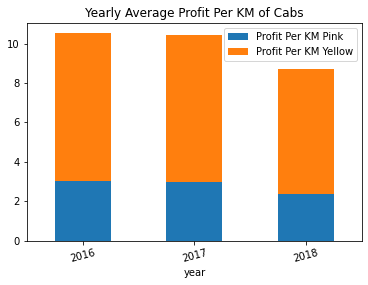

In [26]:
yearlyprofits= yearlyprofits.set_index("year")
yearlyprofits.plot.bar(stacked=True,rot=15, title="Yearly Average Profit Per KM of Cabs")
#Is Average Profit Per KM different?

In [27]:
#Does the cities affects the average profit per KM?

In [28]:
pinkcab["NonProfitable"] = (pinkcab["Profit"] <=0)
pinkcab

<ipython-input-28-dd26a2adfd41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pinkcab["NonProfitable"] = (pinkcab["Profit"] <=0)


Transaction ID Customer ID Payment_Mode Date of Travel   Company  \
0            10000011       29290         Card     2016-01-08  Pink Cab   
3            10000012       27703         Card     2016-01-06  Pink Cab   
6            10395626       27703         Card     2018-10-27  Pink Cab   
7            10000013       28712         Cash     2016-01-02  Pink Cab   
11           10000014       28020         Cash     2016-01-07  Pink Cab   
...               ...         ...          ...            ...       ...   
359331       10437193       47760         Card     2018-01-05  Pink Cab   
359332       10437278       18620         Card     2018-01-02  Pink Cab   
359333       10437570       14974         Cash     2018-01-05  Pink Cab   
359334       10437576       41135         Card     2018-01-05  Pink Cab   
359335       10437582       39899         Cash     2018-01-05  Pink Cab   

                  City  KM Travelled  Price Charged  Cost of Trip  year  \
0           ATLANTA GA         30.45         370.95       313.635  2016   
3           ATLANTA GA         28.62         358.52       334.854  2016   
6           ATLANTA GA         13.39         167.03       141.934  2018   
7           ATLANTA GA          9.04         125.20        97.632  2016   
11          ATLANTA GA         33.17         377.40       351.602  2016   
...                ...           ...            ...           ...   ...   
359331   SACRAMENTO CA         31.03         436.06       344.433  2018   
359332    SAN DIEGO CA         26.73         343.83       304.722  2018   
359333  SILICON VALLEY         22.23         386.13       264.537  2018   
359334       TUCSON AZ         35.96         461.77       381.176  2018   
359335       TUCSON AZ         31.35         350.39       326.040  2018   

        month  Gender  Age  Income (USD/Month)   Profit  Profit per KM  \
0           1    Male   28               10813   57.315       1.882266   
3           1    Male   27                9237   23.666       0.826904   
6          10    Male   27                9237   25.096       1.874235   
7           1    Male   53               11242   27.568       3.049558   
11          1    Male   23               23327   25.798       0.777751   
...       ...     ...  ...                 ...      ...            ...   
359331      1    Male   47                8823   91.627       2.952852   
359332      1    Male   27                2876   39.108       1.463075   
359333      1    Male   51                8020  121.593       5.469771   
359334      1  Female   24               14269   80.594       2.241212   
359335      1    Male   59               13512   24.350       0.776715   

        Profit Percentage  NonProfitable  
0               15.450869          False  
3                6.601026          False  
6               15.024846          False  
7               22.019169          False  
11               6.835718          False  
...                   ...            ...  
359331          21.012475          False  
359332          11.374226          False  
359333          31.490172          False  
359334          17.453278          False  
359335           6.949399          False  

[84711 rows x 18 columns]

In [29]:
profitablepink =pd.crosstab(pinkcab['City'], pinkcab['NonProfitable'], margins=True).drop('All').assign(Mean = lambda x : 1-( x[True]/x['All']))
profitablepink = pd.DataFrame(profitablepink["Mean"])
profitablepink

Mean
City                    
ATLANTA GA      0.842792
AUSTIN TX       0.920236
BOSTON MA       0.858465
CHICAGO IL      0.764341
DALLAS TX       0.607971
DENVER CO       0.664275
LOS ANGELES CA  0.880946
MIAMI FL        0.863636
NASHVILLE TN    0.701249
NEW YORK NY     0.967495
ORANGE COUNTY   0.889623
PHOENIX AZ      0.746528
PITTSBURGH PA   0.605572
SACRAMENTO CA   0.769115
SAN DIEGO CA    0.913512
SEATTLE WA      0.789898
SILICON VALLEY  0.969186
TUCSON AZ       0.864831
WASHINGTON DC   0.883803

In [30]:
yellowcab["NonProfitable"] = (yellowcab["Profit"] <=0)
yellowcab

<ipython-input-30-0ebcdedb2403>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellowcab["NonProfitable"] = (yellowcab["Profit"] <=0)


Transaction ID Customer ID Payment_Mode Date of Travel     Company  \
1            10351127       29290         Cash     2018-07-21  Yellow Cab   
2            10412921       29290         Card     2018-11-23  Yellow Cab   
4            10320494       27703         Card     2018-04-21  Yellow Cab   
5            10324737       27703         Cash     2018-05-04  Yellow Cab   
8            10079404       28712         Card     2016-09-21  Yellow Cab   
...               ...         ...          ...            ...         ...   
359387       10439790       38520         Card     2018-01-07  Yellow Cab   
359388       10439799       12490         Cash     2018-01-03  Yellow Cab   
359389       10439838       41414         Card     2018-01-04  Yellow Cab   
359390       10439840       41677         Cash     2018-01-06  Yellow Cab   
359391       10439846       39761         Card     2018-01-04  Yellow Cab   

                  City  KM Travelled  Price Charged  Cost of Trip  year  \
1           ATLANTA GA         26.19         598.70      317.4228  2018   
2           ATLANTA GA         42.55         792.05      597.4020  2018   
4           ATLANTA GA         36.38         721.10      467.1192  2018   
5           ATLANTA GA          6.18         138.40       87.5088  2018   
8           ATLANTA GA         39.60         704.30      494.2080  2016   
...                ...           ...            ...           ...   ...   
359387      SEATTLE WA         16.66         261.18      213.9144  2018   
359388  SILICON VALLEY         13.72         277.97      172.8720  2018   
359389       TUCSON AZ         19.00         303.77      232.5600  2018   
359390       TUCSON AZ          5.60          92.42       70.5600  2018   
359391       TUCSON AZ         13.30         244.65      180.3480  2018   

        month  Gender  Age  Income (USD/Month)    Profit  Profit per KM  \
1           7    Male   28               10813  281.2772      10.739870   
2          11    Male   28               10813  194.6480       4.574571   
4           4    Male   27                9237  253.9808       6.981330   
5           5    Male   27                9237   50.8912       8.234822   
8           9    Male   53               11242  210.0920       5.305354   
...       ...     ...  ...                 ...       ...            ...   
359387      1  Female   42               19417   47.2656       2.837071   
359388      1    Male   33               18713  105.0980       7.660204   
359389      1    Male   38                3960   71.2100       3.747895   
359390      1    Male   23               19454   21.8600       3.903571   
359391      1  Female   32               10128   64.3020       4.834737   

        Profit Percentage  NonProfitable  
1               46.981326          False  
2               24.575216          False  
4               35.221301          False  
5               36.771098          False  
8               29.829902          False  
...                   ...            ...  
359387          18.096945          False  
359388          37.809116          False  
359389          23.442078          False  
359390          23.652889          False  
359391          26.283262          False  

[274681 rows x 18 columns]

In [31]:
profitableyellow = pd.crosstab(yellowcab['City'], yellowcab['NonProfitable'], margins=True).drop('All').assign(Mean = lambda x : 1-( x[True]/x['All']))
profitableyellow = pd.DataFrame(profitableyellow["Mean"])

In [32]:
profitableyellow.index.name = 'city'
profitableyellow.reset_index(inplace=True)
profitableyellow = profitableyellow.rename(columns={"Mean" : "Mean for Yellow Cab"})
profitablepink.index.name = 'city'
profitablepink.reset_index(inplace=True)
profitablepink = profitablepink.rename(columns={"Mean" : "Mean for Pink Cab"})
profitable = pd.merge(profitableyellow, profitablepink)

In [33]:
profitable

city  Mean for Yellow Cab  Mean for Pink Cab
0       ATLANTA GA             0.985160           0.842792
1        AUSTIN TX             0.969947           0.920236
2        BOSTON MA             0.877010           0.858465
3       CHICAGO IL             0.879549           0.764341
4        DALLAS TX             0.999823           0.607971
5        DENVER CO             0.987248           0.664275
6   LOS ANGELES CA             0.976463           0.880946
7         MIAMI FL             0.985400           0.863636
8     NASHVILLE TN             0.877673           0.701249
9      NEW YORK NY             1.000000           0.967495
10   ORANGE COUNTY             0.974484           0.889623
11      PHOENIX AZ             0.975000           0.746528
12   PITTSBURGH PA             0.893819           0.605572
13   SACRAMENTO CA             0.797677           0.769115
14    SAN DIEGO CA             0.965159           0.913512
15      SEATTLE WA             0.952137           0.789898
16  SILICON VALLEY             1.000000           0.969186
17       TUCSON AZ             0.850707           0.864831
18   WASHINGTON DC             0.930753           0.883803

In [34]:
profitable["Mean for Yellow Cab"] = profitable["Mean for Yellow Cab"]*100
profitable["Mean for Pink Cab"] = profitable["Mean for Pink Cab"]*100

<AxesSubplot:title={'center':'Profitable Percantage'}, xlabel='city'>

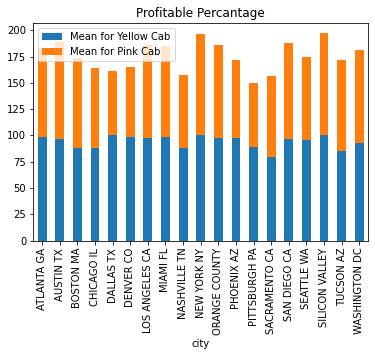

In [35]:
profitable= profitable.set_index("city")
profitable.plot.bar(stacked=True,rot=90, title="Profitable Percantage")

In [36]:
profitable

Mean for Yellow Cab  Mean for Pink Cab
city                                                  
ATLANTA GA                98.515962          84.279228
AUSTIN TX                 96.994716          92.023555
BOSTON MA                 87.700971          85.846510
CHICAGO IL                87.954892          76.434142
DALLAS TX                 99.982260          60.797101
DENVER CO                 98.724805          66.427547
LOS ANGELES CA            97.646265          88.094639
MIAMI FL                  98.539982          86.363636
NASHVILLE TN              87.767322          70.124932
NEW YORK NY              100.000000          96.749481
ORANGE COUNTY             97.448360          88.962327
PHOENIX AZ                97.500000          74.652778
PITTSBURGH PA             89.381933          60.557185
SACRAMENTO CA             79.767667          76.911544
SAN DIEGO CA              96.515892          91.351199
SEATTLE WA                95.213675          78.989751
SILICON VALLEY           100.000000          96.918620
TUCSON AZ                 85.070671          86.483104
WASHINGTON DC             93.075290          88.380282

In [37]:
#Yearly profit Analysis

In [38]:
pinkyearlyallprofit = pd.DataFrame(yearlypink["Profit"].sum())
pinkyearlyallprofit

Profit
year             
2016  1713511.224
2017  2033654.908
2018  1560162.189

In [39]:
yellowyearlyallprofit = pd.DataFrame(yearlyyellow["Profit"].sum())
yellowyearlyallprofit

Profit
year              
2016  1.392700e+07
2017  1.657598e+07
2018  1.351740e+07

In [40]:
pinkyearlyallprofit.index.name = 'year'
pinkyearlyallprofit.reset_index(inplace=True)
pinkyearlyallprofit = pinkyearlyallprofit.rename(columns={"Profit" : "Profit of Pink"})
yellowyearlyallprofit.index.name = 'year'
yellowyearlyallprofit.reset_index(inplace=True)
yellowyearlyallprofit = yellowyearlyallprofit.rename(columns={"Profit" : "Profit of Yellow"})
allprofit = pd.merge(yellowyearlyallprofit, pinkyearlyallprofit)

In [41]:
allprofit

year  Profit of Yellow  Profit of Pink
0  2016      1.392700e+07     1713511.224
1  2017      1.657598e+07     2033654.908
2  2018      1.351740e+07     1560162.189

In [42]:
allprofit= allprofit.set_index("year")

<AxesSubplot:title={'center':'Yearly Profit'}, xlabel='year'>

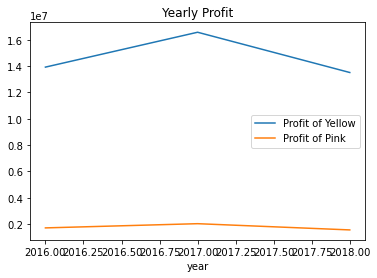

In [43]:
allprofit.plot.line(title="Yearly Profit")

In [44]:
#Is profit percentage changing with respect to choice of cabs?

In [45]:
cityyellow = yellowcab.groupby("City")
citypink = pinkcab.groupby("City")

In [46]:
meanprofitperpink = pd.DataFrame(citypink["Profit Percentage"].mean())
meanprofitperpink.index.name = 'city'
meanprofitperpink.reset_index(inplace=True)
meanprofitperpink = meanprofitperpink.rename(columns={"Profit Percentage" : "Profit Percentage of Pink"})
meanprofitperyellow = pd.DataFrame(cityyellow["Profit Percentage"].mean())
meanprofitperyellow.index.name = 'city'
meanprofitperyellow.reset_index(inplace=True)
meanprofitperyellow = meanprofitperyellow.rename(columns={"Profit Percentage" : "Profit Percentage of Yellow"})
meanprofit = pd.merge(meanprofitperyellow, meanprofitperpink)
meanprofit= meanprofit.set_index("city")


<AxesSubplot:title={'center':'Profit Percentage'}, xlabel='city'>

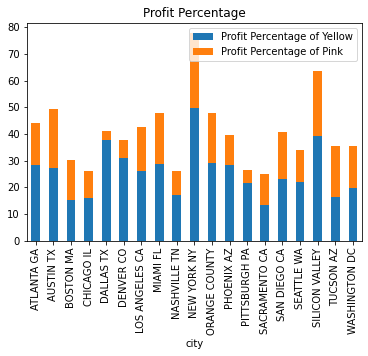

In [47]:
meanprofit.plot.bar(stacked=True,rot=90, title="Profit Percentage")

In [48]:
#Is yelllow more preferrable?

In [49]:
df

Transaction ID Customer ID Payment_Mode Date of Travel     Company  \
0            10000011       29290         Card     2016-01-08    Pink Cab   
1            10351127       29290         Cash     2018-07-21  Yellow Cab   
2            10412921       29290         Card     2018-11-23  Yellow Cab   
3            10000012       27703         Card     2016-01-06    Pink Cab   
4            10320494       27703         Card     2018-04-21  Yellow Cab   
...               ...         ...          ...            ...         ...   
359387       10439790       38520         Card     2018-01-07  Yellow Cab   
359388       10439799       12490         Cash     2018-01-03  Yellow Cab   
359389       10439838       41414         Card     2018-01-04  Yellow Cab   
359390       10439840       41677         Cash     2018-01-06  Yellow Cab   
359391       10439846       39761         Card     2018-01-04  Yellow Cab   

                  City  KM Travelled  Price Charged  Cost of Trip  year  \
0           ATLANTA GA         30.45         370.95      313.6350  2016   
1           ATLANTA GA         26.19         598.70      317.4228  2018   
2           ATLANTA GA         42.55         792.05      597.4020  2018   
3           ATLANTA GA         28.62         358.52      334.8540  2016   
4           ATLANTA GA         36.38         721.10      467.1192  2018   
...                ...           ...            ...           ...   ...   
359387      SEATTLE WA         16.66         261.18      213.9144  2018   
359388  SILICON VALLEY         13.72         277.97      172.8720  2018   
359389       TUCSON AZ         19.00         303.77      232.5600  2018   
359390       TUCSON AZ          5.60          92.42       70.5600  2018   
359391       TUCSON AZ         13.30         244.65      180.3480  2018   

        month  Gender  Age  Income (USD/Month)    Profit  Profit per KM  \
0           1    Male   28               10813   57.3150       1.882266   
1           7    Male   28               10813  281.2772      10.739870   
2          11    Male   28               10813  194.6480       4.574571   
3           1    Male   27                9237   23.6660       0.826904   
4           4    Male   27                9237  253.9808       6.981330   
...       ...     ...  ...                 ...       ...            ...   
359387      1  Female   42               19417   47.2656       2.837071   
359388      1    Male   33               18713  105.0980       7.660204   
359389      1    Male   38                3960   71.2100       3.747895   
359390      1    Male   23               19454   21.8600       3.903571   
359391      1  Female   32               10128   64.3020       4.834737   

        Profit Percentage  
0               15.450869  
1               46.981326  
2               24.575216  
3                6.601026  
4               35.221301  
...                   ...  
359387          18.096945  
359388          37.809116  
359389          23.442078  
359390          23.652889  
359391          26.283262  

[359392 rows x 17 columns]

In [50]:
yellowcust =pd.DataFrame(yellowcab.groupby(["Customer ID", "year"])["Transaction ID"].count())
pinkcust = pd.DataFrame(pinkcab.groupby(["Customer ID", "year"])["Transaction ID"].count())
pinkcust.index.name = 'Customer ID',"year"
pinkcust.reset_index(inplace=True)
pinkcust = pinkcust.rename(columns={"Transaction ID" : "How many times customer uses pink"})
yellowcust.index.name = 'Customer ID',"year"
yellowcust.reset_index(inplace=True)
yellowcust = yellowcust.rename(columns={"Transaction ID" : "How many times customer uses yellow"})
cust =pd.merge(yellowcust, pinkcust)


In [51]:
cust["Yellow > Pink"] = (cust["How many times customer uses pink"] <cust["How many times customer uses yellow"])
cust

Customer ID  year  How many times customer uses yellow  \
0               1  2016                                    8   
1               1  2017                                   11   
2              10  2017                                    7   
3              10  2018                                    6   
4             100  2016                                   10   
...           ...   ...                                  ...   
37387        9990  2016                                    1   
37388        9991  2016                                    1   
37389        9992  2017                                    2   
37390        9993  2018                                    1   
37391        9996  2017                                    1   

       How many times customer uses pink  Yellow > Pink  
0                                      1           True  
1                                      3           True  
2                                      2           True  
3                                      1           True  
4                                      1           True  
...                                  ...            ...  
37387                                  1          False  
37388                                  1          False  
37389                                  1           True  
37390                                  2          False  
37391                                  1          False  

[37392 rows x 5 columns]

In [52]:
custdata = pd.crosstab(cust['year'], cust["Yellow > Pink"], margins=True).drop('All').assign(Mean = lambda x : x[True])
custdata["Pink Percentage"] = custdata[False] / custdata["All"]*100
custdata["Yellow Percentage"] = custdata[True] / custdata["All"]*100
custlast = pd.DataFrame()
custlast["Yellow Preferred"] = custdata["Yellow Percentage"]
custlast["Pink Preferred"] = custdata["Pink Percentage"]
custlast

Yellow Preferred  Pink Preferred
year                                  
2016         64.345623       35.654377
2017         65.729215       34.270785
2018         64.893288       35.106712

<AxesSubplot:title={'center':'Profitable Percantage'}, xlabel='year'>

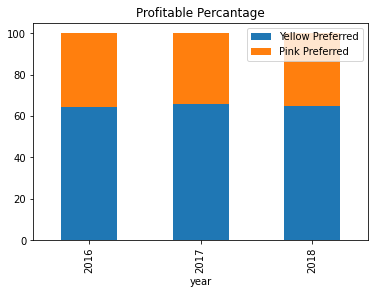

In [53]:
custlast.plot.bar(stacked=True,rot=90, title="Profitable Percantage")

In [54]:
# Are there seasonality patterns in the demand of cabs?

In [55]:
yellowcab["Quarter"] = yellowcab["Date of Travel"].dt.quarter

<ipython-input-55-9f1935647a01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellowcab["Quarter"] = yellowcab["Date of Travel"].dt.quarter


In [56]:
yellowcab

Transaction ID Customer ID Payment_Mode Date of Travel     Company  \
1            10351127       29290         Cash     2018-07-21  Yellow Cab   
2            10412921       29290         Card     2018-11-23  Yellow Cab   
4            10320494       27703         Card     2018-04-21  Yellow Cab   
5            10324737       27703         Cash     2018-05-04  Yellow Cab   
8            10079404       28712         Card     2016-09-21  Yellow Cab   
...               ...         ...          ...            ...         ...   
359387       10439790       38520         Card     2018-01-07  Yellow Cab   
359388       10439799       12490         Cash     2018-01-03  Yellow Cab   
359389       10439838       41414         Card     2018-01-04  Yellow Cab   
359390       10439840       41677         Cash     2018-01-06  Yellow Cab   
359391       10439846       39761         Card     2018-01-04  Yellow Cab   

                  City  KM Travelled  Price Charged  Cost of Trip  year  \
1           ATLANTA GA         26.19         598.70      317.4228  2018   
2           ATLANTA GA         42.55         792.05      597.4020  2018   
4           ATLANTA GA         36.38         721.10      467.1192  2018   
5           ATLANTA GA          6.18         138.40       87.5088  2018   
8           ATLANTA GA         39.60         704.30      494.2080  2016   
...                ...           ...            ...           ...   ...   
359387      SEATTLE WA         16.66         261.18      213.9144  2018   
359388  SILICON VALLEY         13.72         277.97      172.8720  2018   
359389       TUCSON AZ         19.00         303.77      232.5600  2018   
359390       TUCSON AZ          5.60          92.42       70.5600  2018   
359391       TUCSON AZ         13.30         244.65      180.3480  2018   

        month  Gender  Age  Income (USD/Month)    Profit  Profit per KM  \
1           7    Male   28               10813  281.2772      10.739870   
2          11    Male   28               10813  194.6480       4.574571   
4           4    Male   27                9237  253.9808       6.981330   
5           5    Male   27                9237   50.8912       8.234822   
8           9    Male   53               11242  210.0920       5.305354   
...       ...     ...  ...                 ...       ...            ...   
359387      1  Female   42               19417   47.2656       2.837071   
359388      1    Male   33               18713  105.0980       7.660204   
359389      1    Male   38                3960   71.2100       3.747895   
359390      1    Male   23               19454   21.8600       3.903571   
359391      1  Female   32               10128   64.3020       4.834737   

        Profit Percentage  NonProfitable  Quarter  
1               46.981326          False        3  
2               24.575216          False        4  
4               35.221301          False        2  
5               36.771098          False        2  
8               29.829902          False        3  
...                   ...            ...      ...  
359387          18.096945          False        1  
359388          37.809116          False        1  
359389          23.442078          False        1  
359390          23.652889          False        1  
359391          26.283262          False        1  

[274681 rows x 19 columns]

In [57]:
seasonalityyellow = pd.DataFrame(yellowcab.groupby(["year","Quarter"])["Transaction ID"].count())
seasonalityyellow.reset_index(inplace=True)
seasonalityyellow = seasonalityyellow.rename(columns={"Transaction ID" : "How many times yellow is used in a quarter"})
seasonalityyellow

year  Quarter  How many times yellow is used in a quarter
0   2016        1                                       13539
1   2016        2                                       16994
2   2016        3                                       21862
3   2016        4                                       29844
4   2017        1                                       18031
5   2017        2                                       19516
6   2017        3                                       25799
7   2017        4                                       34843
8   2018        1                                       18902
9   2018        2                                       18418
10  2018        3                                       24210
11  2018        4                                       32723

In [58]:
pinkcab["Quarter"] = pinkcab["Date of Travel"].dt.quarter

<ipython-input-58-365a96cd2f76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pinkcab["Quarter"] = pinkcab["Date of Travel"].dt.quarter


In [59]:
seasonalitypink = pd.DataFrame(pinkcab.groupby(["year","Quarter"])["Transaction ID"].count())
seasonalitypink.reset_index(inplace=True)
seasonalitypink = seasonalitypink.rename(columns={"Transaction ID" : "How many times pink is used in a quarter"})
seasonalitypink

year  Quarter  How many times pink is used in a quarter
0   2016        1                                      3208
1   2016        2                                      4537
2   2016        3                                      7251
3   2016        4                                     10084
4   2017        1                                      4432
5   2017        2                                      5294
6   2017        3                                      8662
7   2017        4                                     11933
8   2018        1                                      5015
9   2018        2                                      5089
10  2018        3                                      8074
11  2018        4                                     11132

In [60]:
seasonality = pd.merge(seasonalitypink,seasonalityyellow)

In [61]:
seasonality = seasonality.set_index(["year", "Quarter"])


In [62]:
seasonality

How many times pink is used in a quarter  \
year Quarter                                             
2016 1                                            3208   
     2                                            4537   
     3                                            7251   
     4                                           10084   
2017 1                                            4432   
     2                                            5294   
     3                                            8662   
     4                                           11933   
2018 1                                            5015   
     2                                            5089   
     3                                            8074   
     4                                           11132   

              How many times yellow is used in a quarter  
year Quarter                                              
2016 1                                             13539  
     2                                             16994  
     3                                             21862  
     4                                             29844  
2017 1                                             18031  
     2                                             19516  
     3                                             25799  
     4                                             34843  
2018 1                                             18902  
     2                                             18418  
     3                                             24210  
     4                                             32723

<AxesSubplot:title={'center':'Seasonality in Demand'}, xlabel='year,Quarter'>

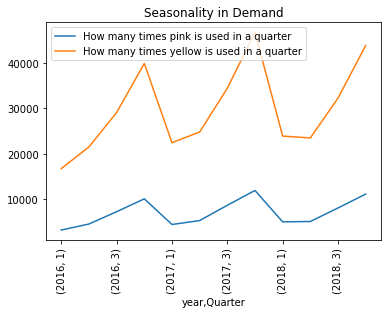

In [75]:
seasonality.plot.line(stacked=True,rot=90, title="Seasonality in Demand")

In [76]:
#Do months affect the usage of the cab?

In [86]:
monthlypink =pd.DataFrame(pinkcab.groupby("month")["Transaction ID"].count())

In [87]:
monthlypink

Transaction ID
month                
1                5057
2                3375
3                4223
4                4083
5                4960
6                5877
7                6590
8                7739
9                9658
10              10576
11              11005
12              11568

<AxesSubplot:title={'center':'Monthly demand for pink'}, xlabel='month'>

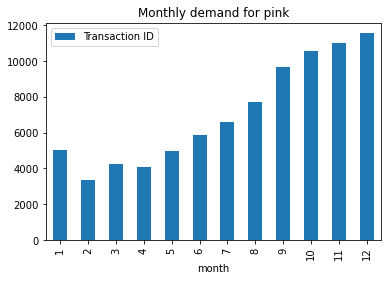

In [89]:
monthlypink.plot.bar(stacked=True,rot=90, title="Monthly demand for pink")

In [90]:
monthlyyellow =pd.DataFrame(yellowcab.groupby("month")["Transaction ID"].count())

<AxesSubplot:title={'center':'Monthly demand for yellow'}, xlabel='month'>

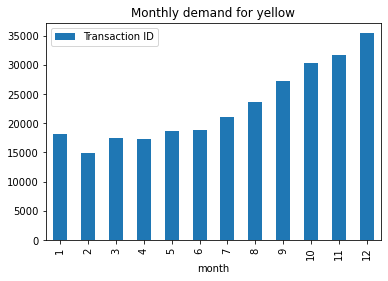

In [91]:
monthlyyellow.plot.bar(stacked=True,rot=90, title="Monthly demand for yellow")